# Decay curve

`.diagonal_mean` method in `Cool` and `DotHiC` can use for calculate the decay curve from a contact matrix.
By using this auxiliary function, it's easy to produce the decay curve plot within specific region.

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.3.0'

Plot a decay curve of chr1 and chr2:

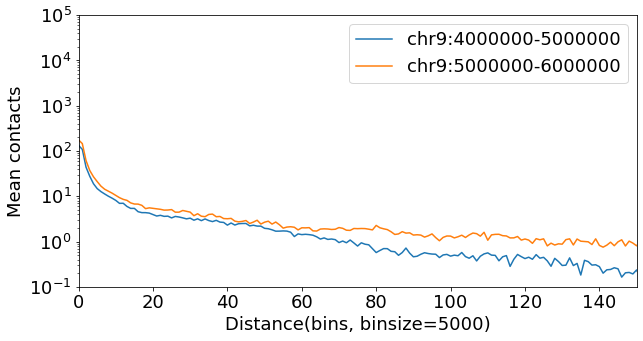

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

dot_hic_path = "../../../tests/test_data/dothic_chr9_4000000_6000000.hic"
dhic = DotHiC(dot_hic_path, balance=False) 

gr1 = "chr9:4000000-5000000"
gr2 = "chr9:5000000-6000000"

mat1 = dhic.fetch_data(gr1)  # any genome region
decay1 = dhic.diagonal_mean(mat1)
mat2 = dhic.fetch_data(gr2)
decay2 = dhic.diagonal_mean(mat2)

binsize = dhic.fetched_binsize

# plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(decay1, label=gr1)
ax.plot(decay2, label=gr2)
plt.yscale('log')  # log scale on y-axis
plt.xlabel(f"Distance(bins, binsize={binsize})")
plt.ylabel("Mean contacts")
plt.xlim(0, 150)
plt.ylim(1e-1, 1e5)
plt.legend()

Another function `.diagonal_mean_std` can get the standard error of contacts in the specific contact distance at the same time, we can show it with a error band:

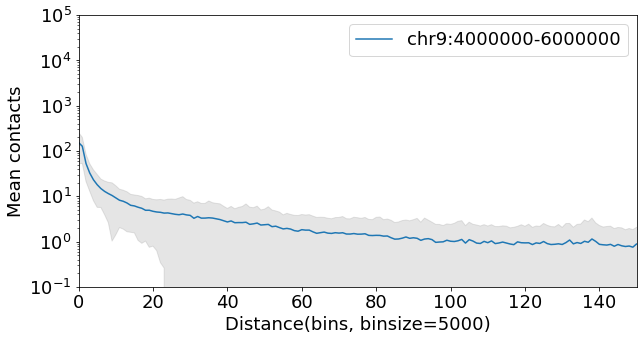

In [4]:
import numpy as np

gr = "chr9:4000000-6000000"
mat1 = dhic.fetch_data(gr)  # any genome region
decay, std = dhic.diagonal_mean_std(mat1)

# plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(decay, label=gr)
ax.fill_between(np.arange(decay.shape[0]), decay - std, decay + std,
                color='gray', alpha=0.2)

plt.yscale('log')  # log scale on y-axis
plt.xlabel(f"Distance(bins, binsize={binsize})")
plt.ylabel("Mean contacts")
plt.xlim(0, 150)
plt.ylim(1e-1, 1e5)
plt.legend()